In [392]:
import pandas as pd
import numpy as np
import pickle
from typing import Optional, Union, Tuple
from cmapPy.pandasGEXpress.parse import parse
import numpy as np
import json
from collections import Counter
import sys
from numpy.core.multiarray import ndarray
import sys
import matplotlib.pyplot as plt

path = "../data/drug_class_identification/phase1/"

### Importing Metadata

In [393]:
meta = pd.read_csv(path+"metadata.csv")
meta.head()

,smiles,name,id,inchi_key
0,-666,akt2,56582,-666
1,-666,hsf1,5981,-666
2,-666,nfe2l2,7150,-666
3,-666,abl1,ABL1_G2A,-666
4,-666,abl1,ABL1_T315I,-666


In [394]:
unique_names = [k for k, v in dict(Counter(meta.name)).items() if v==1]
meta = meta[meta.name.isin(unique_names)]

In [395]:
print("Total number of rows: ",len(list(meta.name)))
print("Unique number of perturbagen names: ",len(list(np.unique(meta.name))))

Total number of rows:  23897
Unique number of perturbagen names:  23897


### Importing Drugbank

In [396]:
drugbank = pd.read_csv(path+"drugbank.csv",low_memory=False)
drugbank.dropna(subset=["atc"], inplace=True)
drugbank.head()

,name,atc,inchi_key,smiles
0,lepirudin,B01AE02,NaN,NaN
1,cetuximab,L01XC06,NaN,NaN
2,dornase alfa,R05CB13,NaN,NaN
3,denileukin diftitox,L01XX29,NaN,NaN
4,etanercept,L04AB01,NaN,NaN


In [397]:
print("Total number of rows: ",len(list(drugbank.name)))
print("Unique number of perturbagen names: ",len(list(np.unique(drugbank.name))))

Total number of rows:  3145
Unique number of perturbagen names:  3145


### Importing ATC

In [398]:
atc = pd.read_csv(path+"atc.csv",low_memory=False)
atc.name = atc.name.str.lower()
atc.head()

,name,atc
0,silicones,A03AX13
1,cefatrizine,J01DB07
2,"technetium 99m compounds, central nervous syst...",V09AA
3,urofollitropin,G03GA04
4,promethazine,D04AA10


In [399]:
unique_names = [k for k, v in dict(Counter(atc.name)).items() if v==1]
atc = atc[atc.name.isin(unique_names)]

print("Total number of rows: ",len(list(atc.name)))
print("Unique number of perturbagen names: ",len(list(np.unique(atc.name))))

Total number of rows:  5088
Unique number of perturbagen names:  5088


### Drugbank + Metadata

In [403]:
# drug_meta = meta.set_index("name").join(drugbank.set_index("name"), lsuffix='_left', rsuffix='_right')
# drug_meta.dropna(subset=["atc"], inplace=True)
# drug_meta = drug_meta[["id", "atc"]]
# drug_meta.head()

In [404]:
perturbagen_drugbank_class = {}
for ind in meta.index:
    answer = drugbank[drugbank.name==meta.name[ind]]
    if answer.empty==False:
        perturbagen_drugbank_class[meta.id[ind]] = answer["atc"]
        continue
    answer = drugbank[drugbank.inchi_key==meta.inchi_key[ind]]
    if answer.empty==False:
        perturbagen_drugbank_class[meta.id[ind]] = answer["atc"]
        continue
    

In [405]:
len(perturbagen_drugbank_class.keys())

924

### ATC + Metadata

In [409]:
# atc_meta = meta.set_index("name").join(atc.set_index("name"), lsuffix='_left', rsuffix='_right')
# atc_meta.dropna(subset=["atc"], inplace=True)
# atc_meta = atc_meta[["id", "atc"]]
# atc_meta.head()

In [410]:
perturbagen_atc_class = {}
for ind in meta.index:
    answer = atc[atc.name==meta.name[ind]]
    if answer.empty==False:
        perturbagen_atc_class[meta.id[ind]] = answer["atc"]

In [425]:
len(perturbagen_atc_class.keys())

715

In [411]:
perturbagen_class = {}

for key, value in perturbagen_drugbank_class.items():
    if key not in perturbagen_class.keys():
        perturbagen_class[key] = list(value)[0]
        
for key, value in perturbagen_atc_class.items():
    if key not in perturbagen_class.keys():
        perturbagen_class[key] = list(value)[0]


print(len(perturbagen_class.keys()))

928


In [412]:
atc_level1 = [v[:1] for k, v in perturbagen_class.items()]

<BarContainer object of 14 artists>

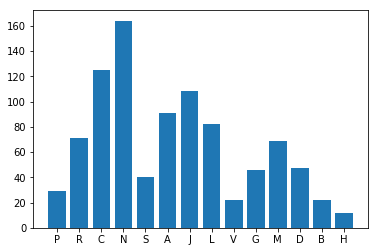

In [413]:
atc_level_distribution = dict(Counter(atc_level1))
plt.bar(atc_level_distribution.keys(), atc_level_distribution.values())

In [415]:
with open("../data/perturbagen_class.pkl", "wb") as file:
    pickle.dump(perturbagen_class, file)

In [421]:
meta2 = pd.read_csv("../data/drug_class_identification/phase2/meta.csv")
meta2.head()

,smiles,name,id,inchi_key
0,CCN(CC)CCCCN1C2CCCCC2OC2CCC(CL)CC12,10-DEBC,BRD-K70792160,GYBXAGDWMCJZJK-UHFFFAOYSA-N
1,CCCCCCCCCCCCCC(=O)O[C@@H]1[C@@H](C)[C@]2(O)[C@...,phorbol-myristate-acetate,BRD-K68552125,PHEDXBVPIONUQT-RGYGYFBISA-N
2,CCCCC(C)(C)[C@H](O)\C=C\[C@H]1[C@H](O)CC(=O)[C...,"16,16-dimethylprostaglandin-e2",BRD-K92301463,QAOBBBBDJSWHMU-WMBBNPMCSA-N
3,CCCCCC(=O)O[C@@]1(CCC2C3CCC4=CC(=O)CC[C@]4(C)C...,17-hydroxyprogesterone-caproate,BRD-A29731977,DOMWKUIIPQCAJU-JKPPDDDBSA-N
4,OC(=O)CCCC[C@@H]1SC[C@@H]2NC(=N)N[C@H]12,2-iminobiotin,BRD-K07954936,WWVANQJRLPIHNS-ZKWXMUAHSA-N


In [424]:
unique_names = [k for k, v in dict(Counter(meta2.name)).items() if v==1]
meta2 = meta2[meta2.name.isin(unique_names)]
print("Total number of rows: ",len(list(meta2.name)))
print("Unique number of perturbagen names: ",len(list(np.unique(meta2.name))))

Total number of rows:  1744
Unique number of perturbagen names:  1744


In [427]:
perturbagen_drugbank_class2 = {}
for ind in meta2.index:
    answer = drugbank[drugbank.name==meta2.name[ind]]
    if answer.empty==False:
        perturbagen_drugbank_class2[meta2.id[ind]] = answer["atc"]
        continue
    answer = drugbank[drugbank.inchi_key==meta2.inchi_key[ind]]
    if answer.empty==False:
        perturbagen_drugbank_class2[meta2.id[ind]] = answer["atc"]
        continue
len(perturbagen_drugbank_class2.keys())

830

In [428]:
perturbagen_atc_class2 = {}
for ind in meta2.index:
    answer = atc[atc.name==meta2.name[ind]]
    if answer.empty==False:
        perturbagen_atc_class2[meta2.id[ind]] = answer["atc"]
        
len(perturbagen_atc_class2.keys())

642

In [429]:
perturbagen_class2 = {}

for key, value in perturbagen_drugbank_class2.items():
    if key not in perturbagen_class2.keys():
        perturbagen_class2[key] = list(value)[0]
        
for key, value in perturbagen_atc_class2.items():
    if key not in perturbagen_class2.keys():
        perturbagen_class2[key] = list(value)[0]


print(len(perturbagen_class2.keys()))

834


In [438]:
len(set(perturbagen_class2.keys()).intersection(perturbagen_class.keys()))

424

In [436]:
all_perturbagen_class = {}

for key, value in perturbagen_class.items():
    if key not in all_perturbagen_class.keys():
        all_perturbagen_class[key] = value
        
for key, value in perturbagen_class2.items():
    if key not in all_perturbagen_class.keys():
        all_perturbagen_class[key] = value

In [437]:
len(all_perturbagen_class.keys())

1338

[]

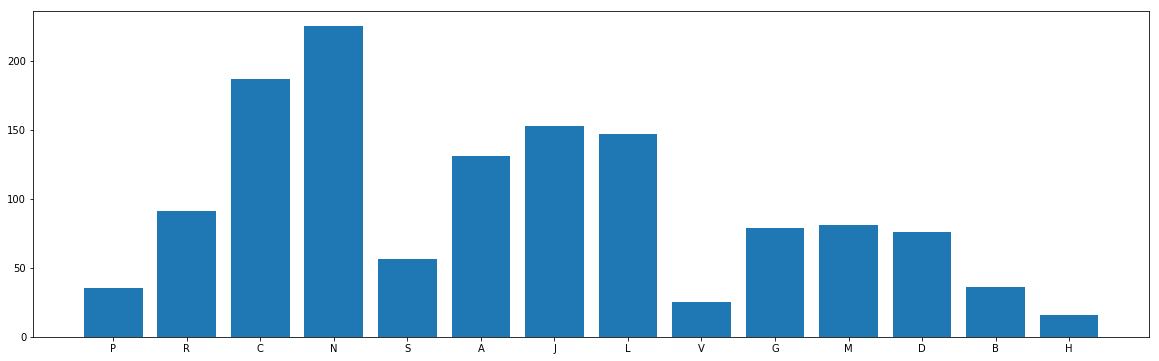

In [448]:
atc_level1 = [v[:1] for k,v in all_perturbagen_class.items()]
atc_level1_distribution = dict(Counter(atc_level1))
plt.figure(figsize=(20, 6))
plt.bar(atc_level1_distribution.keys(), atc_level1_distribution.values())
plt.plot()

[]

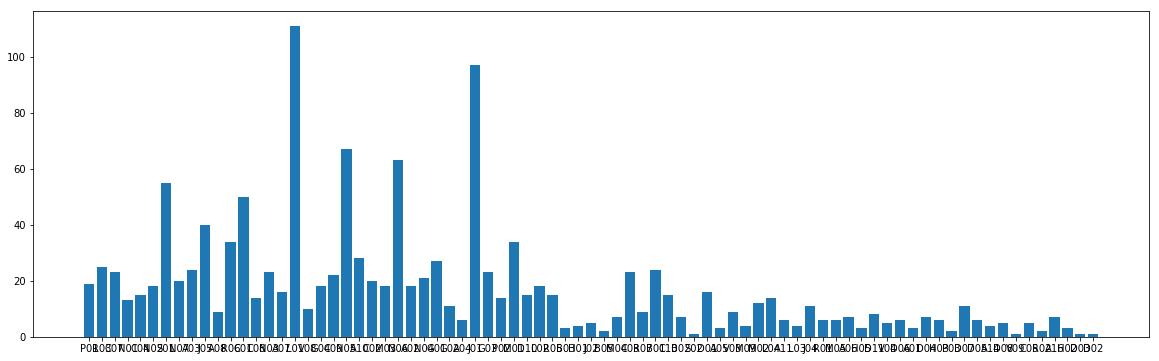

In [450]:
atc_level2 = [v[:3] for k,v in all_perturbagen_class.items()]
atc_level2_distribution = dict(Counter(atc_level2))
plt.figure(figsize=(20, 6))
plt.bar(atc_level2_distribution.keys(), atc_level2_distribution.values())
plt.plot()

In [451]:
atc_level2_distribution

{'P01': 19,
 'R03': 25,
 'C07': 23,
 'N01': 13,
 'C04': 15,
 'N02': 18,
 'S01': 55,
 'N07': 20,
 'A03': 24,
 'J05': 40,
 'A08': 9,
 'R06': 34,
 'C01': 50,
 'C08': 14,
 'N03': 23,
 'A07': 16,
 'L01': 111,
 'V08': 10,
 'G04': 18,
 'C09': 22,
 'N05': 67,
 'A10': 28,
 'C02': 20,
 'M03': 18,
 'N06': 63,
 'A02': 18,
 'N04': 21,
 'G01': 27,
 'G02': 11,
 'A04': 6,
 'J01': 97,
 'G03': 23,
 'P02': 14,
 'M01': 34,
 'D10': 15,
 'L02': 18,
 'R05': 15,
 'B03': 3,
 'H01': 4,
 'J02': 5,
 'B05': 2,
 'M04': 7,
 'C03': 23,
 'R07': 9,
 'B01': 24,
 'C10': 15,
 'B02': 7,
 'S02': 1,
 'D01': 16,
 'A05': 3,
 'V03': 9,
 'M09': 4,
 'M02': 12,
 'L04': 14,
 'A11': 6,
 'L03': 4,
 'J04': 11,
 'R01': 6,
 'M05': 6,
 'A06': 7,
 'H05': 3,
 'D11': 8,
 'V04': 5,
 'D06': 6,
 'A01': 3,
 'D04': 7,
 'H03': 6,
 'P03': 2,
 'D07': 11,
 'D05': 6,
 'A14': 4,
 'D08': 5,
 'V09': 1,
 'C05': 5,
 'R02': 2,
 'A16': 7,
 'H02': 3,
 'D03': 1,
 'D02': 1}